### 1. Radon变换的定义
Radon变换是一种积分变换，由奥地利数学家约翰·拉东（Johann Radon）在1917年提出。在图像处理领域，Radon变换常用于断层扫描（如CT扫描），它将二维图像在不同角度下进行线积分，得到一组投影数据。简单来说，Radon变换可以把二维图像转换为一组一维投影，每个投影对应一个特定的角度。

给定一个二维函数 \( f(x,y) \)，其Radon变换 \( R(\theta, s) \) 定义为：
$$
R(\theta, s) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \delta(s - x \cos\theta - y \sin\theta) dx dy
$$
其中，\( \theta \) 是投影的角度，\( s \) 是投影线到原点的垂直距离，\( \delta \) 是狄拉克δ函数。

### 2. Python代码实现及解释
在Python中，可以使用`scipy`库的`radon`函数来实现Radon变换。以下是一个示例代码：

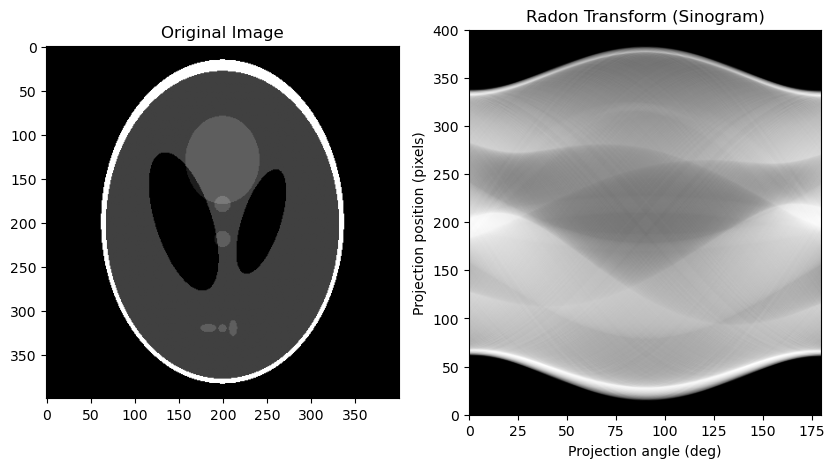

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon

# 生成Shepp-Logan幻影图像
image = shepp_logan_phantom()

# 定义投影角度
theta = np.linspace(0., 180., max(image.shape), endpoint=False)

# 进行Radon变换
sinogram = radon(image, theta=theta, circle=True)

# 显示原始图像和Radon变换后的结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("Original Image")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("Radon Transform (Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

plt.show()



### 3. 代码解释
1. **导入必要的库**：
    - `numpy`：用于数值计算。
    - `matplotlib.pyplot`：用于可视化。
    - `skimage.data.shepp_logan_phantom`：用于生成Shepp-Logan幻影图像，这是一个常用的测试图像。
    - `skimage.transform.radon`：用于执行Radon变换。

2. **生成Shepp-Logan幻影图像**：
    - `image = shepp_logan_phantom()`：生成一个Shepp-Logan幻影图像。

3. **定义投影角度**：
    - `theta = np.linspace(0., 180., max(image.shape), endpoint=False)`：生成从0到180度的投影角度。

4. **进行Radon变换**：
    - `sinogram = radon(image, theta=theta, circle=True)`：对图像进行Radon变换，得到的结果称为正弦图（sinogram）。

5. **显示原始图像和Radon变换后的结果**：
    - 使用`matplotlib`库的`subplots`函数创建一个包含两个子图的图形。
    - 在第一个子图中显示原始图像。
    - 在第二个子图中显示Radon变换后的正弦图。

运行上述代码，你将看到原始图像和对应的Radon变换结果（正弦图）。正弦图中的每一列对应一个特定角度的投影，通过分析正弦图可以重建原始图像。

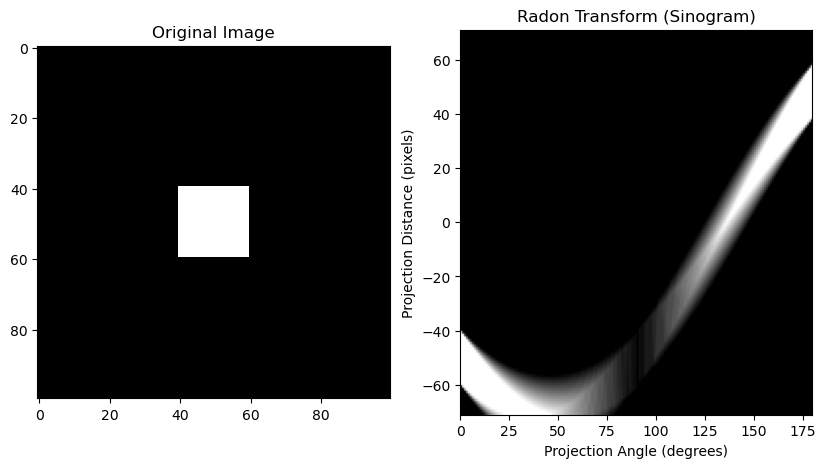

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def radon_transform(image, theta):
    # 获取图像的尺寸
    rows, cols = image.shape
    # 计算最大可能的距离 s 的范围
    diagonal = np.sqrt(rows**2 + cols**2)
    num_s = int(np.ceil(diagonal))
    # 初始化 Radon 变换结果矩阵
    sinogram = np.zeros((num_s, len(theta)))

    # 遍历每个投影角度
    for i, angle in enumerate(theta):
        # 将角度转换为弧度
        angle_rad = np.deg2rad(angle)
        # 遍历每个可能的距离 s
        for s in range(-num_s // 2, num_s // 2):
            # 初始化线积分值
            integral = 0
            # 遍历图像的每一行
            for y in range(rows):
                # 根据投影线方程计算对应的 x 坐标
                x = (s - y * np.sin(angle_rad)) / np.cos(angle_rad)
                # 检查 x 坐标是否在图像范围内
                if 0 <= x < cols:
                    # 进行线性插值获取像素值
                    x0 = int(x)
                    x1 = min(x0 + 1, cols - 1)
                    weight = x - x0
                    pixel_value = (1 - weight) * image[y, x0] + weight * image[y, x1]
                    # 累加像素值到线积分中
                    integral += pixel_value
            # 将线积分值存储到 Radon 变换结果矩阵中
            sinogram[s + num_s // 2, i] = integral

    return sinogram

# 生成一个简单的测试图像
image = np.zeros((100, 100))
image[40:60, 40:60] = 1

# 定义投影角度
theta = np.linspace(0, 180, 180, endpoint=False)

# 进行 Radon 变换
sinogram = radon_transform(image, theta)

# 显示原始图像和 Radon 变换结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(sinogram, cmap='gray', aspect='auto', extent=[0, 180, -np.ceil(np.sqrt(image.shape[0]**2 + image.shape[1]**2)) // 2, np.ceil(np.sqrt(image.shape[0]**2 + image.shape[1]**2)) // 2])
ax2.set_title('Radon Transform (Sinogram)')
ax2.set_xlabel('Projection Angle (degrees)')
ax2.set_ylabel('Projection Distance (pixels)')
plt.show()

In [6]:
range(-5 // 2, 5 // 2)

range(-3, 2)